In [1]:
import pywt
import matplotlib.pyplot as plt
import numpy as np


import utils.getstim as getstim

#jupyter notebook settings
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'dpi' : 200} #plotting pretty

In [ ]:
#make step function 
stim_px_w = 2**13
stim_px_h = 2**13

# Step function
stim_step = getstim.step_stim(stim_px_w,stim_px_h,orient=1, stepdn=True)
f, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.imshow(stim_step, cmap='Greys_r')
ax.set_title('Step Function')
plt.show()


In [ ]:
wavelet = 'db4'
mode = 'smooth'
level = 10
im = stim_step
im_band_coeffs = pywt.wavedec2(im, wavelet, mode, level)
for i in range(7):
    im_band_coeffs_new = [np.zeros_like(i) for i in im_band_coeffs]
    missing_levels = i
    im_band_coeffs_new[:-missing_levels] = im_band_coeffs[:-missing_levels]
    # for i in range(len(im_band_coeffs)):
    #     print (np.array(im_band_coeffs[i]).shape)
    #     im_band_coeffs_new[i] = 
    recon = pywt.waverec2(im_band_coeffs_new, wavelet, mode)
    
    plt.figure()

    plt.subplot(121)
    plt.imshow(im,cmap='Greys_r', vmin=0, vmax=1);
    # plt.axis('off')
    plt.title('img')
    plt.subplot(122)
    plt.imshow(recon, cmap='Greys_r', vmin=0, vmax=1);
    # plt.axis('off')
    plt.title('recon, level'+str(i))
    
    plt.show()


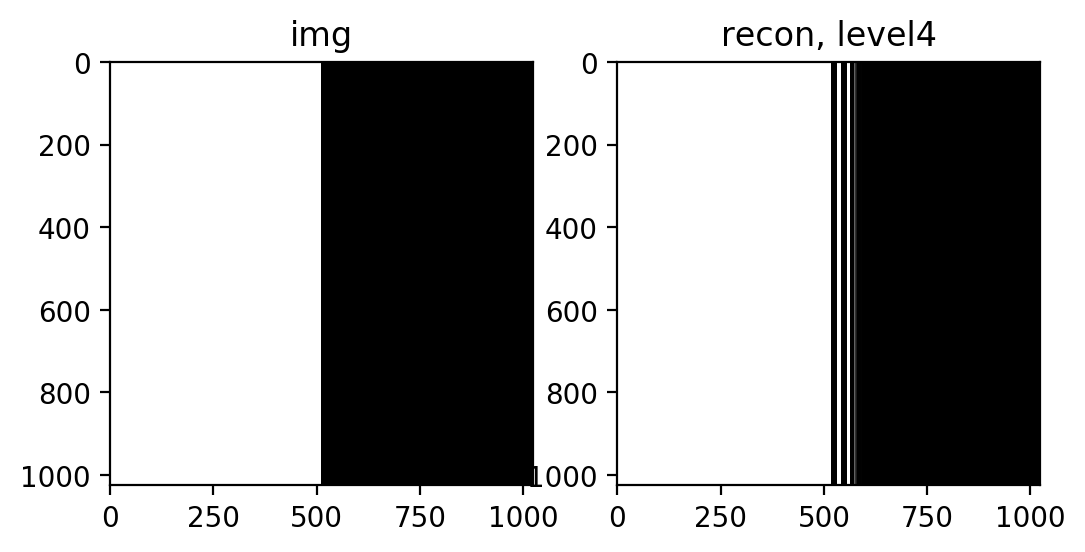

In [26]:
wavelet = 'db4'
mode = 'smooth'
level = 7
im = stim_step
im_band_coeffs = pywt.wavedec2(im, wavelet, mode, level)
im_band_coeffs_new = [np.zeros_like(i) for i in im_band_coeffs]

i = 4
missing_levels = i
im_band_coeffs_new[:-missing_levels] = im_band_coeffs[:-missing_levels]
# for i in range(len(im_band_coeffs)):
#     print (np.array(im_band_coeffs[i]).shape)
#     im_band_coeffs_new[i] = 
recon = pywt.waverec2(im_band_coeffs_new, wavelet, mode)

plt.figure()

plt.subplot(121)
plt.imshow(im,cmap='Greys_r', vmin=0, vmax=1);
# plt.axis('off')
plt.title('img')
plt.subplot(122)
plt.imshow(recon, cmap='Greys_r', vmin=0, vmax=1);
# plt.axis('off')
plt.title('recon, level'+str(i))
